# GAN

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend('agg') 

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np
from PIL import Image
import argparse
import math

In [0]:
!pip install logger
from logger import logger

In [0]:
shape = (28, 28, 1)
epochs = 400
batch = 32
save_interval = 100

In [0]:
def generator():
    model = Sequential()
    model.add(Dense(256, input_shape=(100,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape(shape))
    return model

In [0]:
def discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=shape))
    model.add(Dense((28 * 28 * 1), input_shape=shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(int((28 * 28 * 1) / 2)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [0]:
Generator = generator()
Generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

Discriminator = discriminator()
Discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8),metrics=['accuracy'])

In [0]:
print(Discriminator.summary(), Generator.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 392)               307720    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 392)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 393       
Total params: 923,553
Trainable params: 923,553
Non-trainable params: 0
_________________________________________________________________
____

In [0]:
Generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              525312    
__________

In [0]:
def stacked_generator_discriminator(D, G):
    D.trainable = False
    model = Sequential()
    model.add(G)
    model.add(D)
    return model

In [0]:
def plot_images(samples=16, step=0):
    filename = "mnist_%d.png" % step
    noise = np.random.normal(0, 1, (samples, 100))
    images = Generator.predict(noise)
    plt.figure(figsize=(5, 5))

    for i in range(images.shape[0]):
        plt.subplot(4, 4, i + 1)
        image = images[i, :, :, :]
        image = np.reshape(image, [28, 28])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    #plt.close('all')

In [0]:
stacked_generator_discriminator = stacked_generator_discriminator(Discriminator, Generator)
stacked_generator_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

In [0]:
stacked_generator_discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 28, 28, 1)         1493520   
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 923553    
Total params: 2,417,073
Trainable params: 1,489,936
Non-trainable params: 927,137
_________________________________________________________________


In [0]:
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
save_interval = 250

Instructions for updating:
Use tf.cast instead.
[25/Feb/2019 05:51:26] WARNING - From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[25/Feb/2019 05:51:29] INFO - epoch: 0, [Discriminator: 0.7892478704452515], [Generator: 0.9424276351928711]


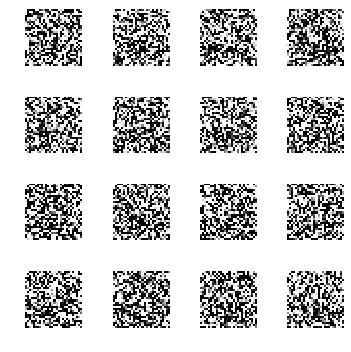

[25/Feb/2019 05:51:30] INFO - epoch: 1, [Discriminator: 0.3200582265853882], [Generator: 1.0028454065322876]
[25/Feb/2019 05:51:30] INFO - epoch: 2, [Discriminator: 0.24754278361797333], [Generator: 1.1263818740844727]
[25/Feb/2019 05:51:30] INFO - epoch: 3, [Discriminator: 0.2032855898141861], [Generator: 1.318976640701294]
[25/Feb/2019 05:51:30] INFO - epoch: 4, [Discriminator: 0.18228134512901306], [Generator: 1.502730131149292]
[25/Feb/2019 05:51:30] INFO - epoch: 5, [Discriminator: 0.16108117997646332], [Generator: 1.6567232608795166]
[25/Feb/2019 05:51:30] INFO - epoch: 6, [Discriminator: 0.14789415895938873], [Generator: 1.85564386844635]
[25/Feb/2019 05:51:30] INFO - epoch: 7, [Discriminator: 0.10723823308944702], [Generator: 1.9089124202728271]
[25/Feb/2019 05:51:30] INFO - epoch: 8, [Discriminator: 0.09044133871793747], [Generator: 2.032689094543457]
[25/Feb/2019 05:51:30] INFO - epoch: 9, [Discriminator: 0.07000406831502914], [Generator: 2.212491273880005]
[25/Feb/2019 05:51

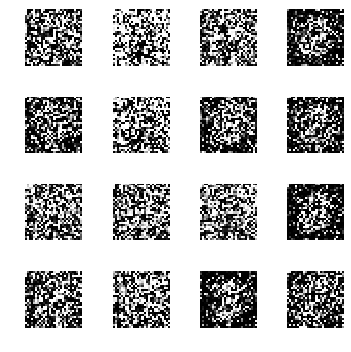

[25/Feb/2019 05:51:37] INFO - epoch: 251, [Discriminator: 0.11722880601882935], [Generator: 3.682220220565796]
[25/Feb/2019 05:51:37] INFO - epoch: 252, [Discriminator: 0.0695645734667778], [Generator: 3.2503087520599365]
[25/Feb/2019 05:51:37] INFO - epoch: 253, [Discriminator: 0.23225606977939606], [Generator: 3.2200779914855957]
[25/Feb/2019 05:51:37] INFO - epoch: 254, [Discriminator: 0.1353173851966858], [Generator: 3.5625712871551514]
[25/Feb/2019 05:51:37] INFO - epoch: 255, [Discriminator: 0.2133817821741104], [Generator: 2.794973134994507]
[25/Feb/2019 05:51:37] INFO - epoch: 256, [Discriminator: 0.2172592580318451], [Generator: 3.8126139640808105]
[25/Feb/2019 05:51:37] INFO - epoch: 257, [Discriminator: 0.0635954737663269], [Generator: 4.206123352050781]
[25/Feb/2019 05:51:37] INFO - epoch: 258, [Discriminator: 0.09778738766908646], [Generator: 3.108828067779541]
[25/Feb/2019 05:51:37] INFO - epoch: 259, [Discriminator: 0.08631793409585953], [Generator: 2.7571020126342773]
[

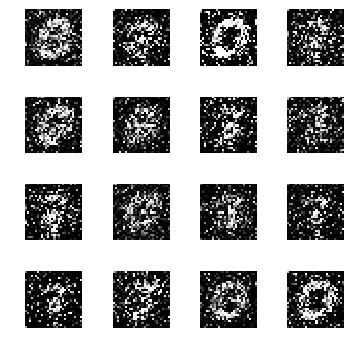

[25/Feb/2019 05:51:43] INFO - epoch: 501, [Discriminator: 0.714496910572052], [Generator: 1.156355619430542]
[25/Feb/2019 05:51:43] INFO - epoch: 502, [Discriminator: 0.6939343810081482], [Generator: 0.5247390866279602]
[25/Feb/2019 05:51:43] INFO - epoch: 503, [Discriminator: 0.6993844509124756], [Generator: 0.712483286857605]
[25/Feb/2019 05:51:43] INFO - epoch: 504, [Discriminator: 0.5461283922195435], [Generator: 0.7912153005599976]
[25/Feb/2019 05:51:43] INFO - epoch: 505, [Discriminator: 0.7020271420478821], [Generator: 0.7153358459472656]
[25/Feb/2019 05:51:43] INFO - epoch: 506, [Discriminator: 0.6264501214027405], [Generator: 0.7572988271713257]
[25/Feb/2019 05:51:43] INFO - epoch: 507, [Discriminator: 0.7019302845001221], [Generator: 0.5503660440444946]
[25/Feb/2019 05:51:43] INFO - epoch: 508, [Discriminator: 0.6447174549102783], [Generator: 1.0275459289550781]
[25/Feb/2019 05:51:43] INFO - epoch: 509, [Discriminator: 0.6266043186187744], [Generator: 0.7564402222633362]
[25/

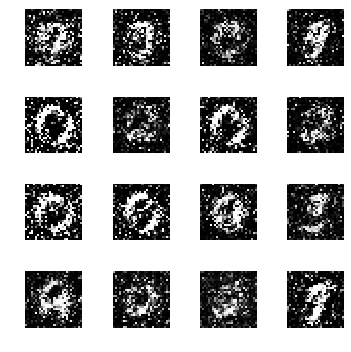

[25/Feb/2019 05:51:50] INFO - epoch: 751, [Discriminator: 0.5637418031692505], [Generator: 0.7261561751365662]
[25/Feb/2019 05:51:50] INFO - epoch: 752, [Discriminator: 0.5362008810043335], [Generator: 0.9253559708595276]
[25/Feb/2019 05:51:50] INFO - epoch: 753, [Discriminator: 0.5851705074310303], [Generator: 0.9103461503982544]
[25/Feb/2019 05:51:50] INFO - epoch: 754, [Discriminator: 0.6627819538116455], [Generator: 0.5708398222923279]
[25/Feb/2019 05:51:50] INFO - epoch: 755, [Discriminator: 0.5721838474273682], [Generator: 0.9711112380027771]
[25/Feb/2019 05:51:50] INFO - epoch: 756, [Discriminator: 0.664574146270752], [Generator: 0.7587764263153076]
[25/Feb/2019 05:51:50] INFO - epoch: 757, [Discriminator: 0.5828619003295898], [Generator: 0.9479987621307373]
[25/Feb/2019 05:51:50] INFO - epoch: 758, [Discriminator: 0.5783994197845459], [Generator: 0.7906211614608765]
[25/Feb/2019 05:51:50] INFO - epoch: 759, [Discriminator: 0.5498084425926208], [Generator: 0.7573296427726746]
[2

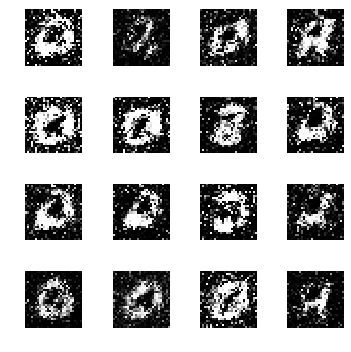

[25/Feb/2019 05:51:56] INFO - epoch: 1001, [Discriminator: 0.5725827217102051], [Generator: 0.8398655652999878]
[25/Feb/2019 05:51:57] INFO - epoch: 1002, [Discriminator: 0.6026886701583862], [Generator: 0.807436466217041]
[25/Feb/2019 05:51:57] INFO - epoch: 1003, [Discriminator: 0.6296957731246948], [Generator: 0.7199488282203674]
[25/Feb/2019 05:51:57] INFO - epoch: 1004, [Discriminator: 0.5910613536834717], [Generator: 0.8776563405990601]
[25/Feb/2019 05:51:57] INFO - epoch: 1005, [Discriminator: 0.5905070304870605], [Generator: 0.9115086197853088]
[25/Feb/2019 05:51:57] INFO - epoch: 1006, [Discriminator: 0.6784841418266296], [Generator: 0.5691862106323242]
[25/Feb/2019 05:51:57] INFO - epoch: 1007, [Discriminator: 0.6022469997406006], [Generator: 1.4418705701828003]
[25/Feb/2019 05:51:57] INFO - epoch: 1008, [Discriminator: 0.7467358112335205], [Generator: 0.4036349654197693]
[25/Feb/2019 05:51:57] INFO - epoch: 1009, [Discriminator: 0.7048314809799194], [Generator: 1.01020979881

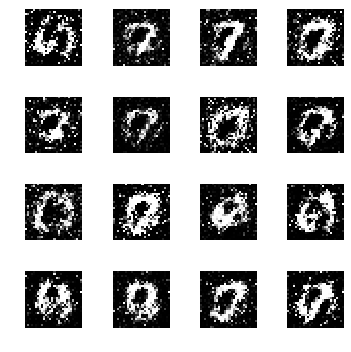

[25/Feb/2019 05:52:03] INFO - epoch: 1251, [Discriminator: 0.5382367372512817], [Generator: 0.95372474193573]
[25/Feb/2019 05:52:03] INFO - epoch: 1252, [Discriminator: 0.49124035239219666], [Generator: 1.0112578868865967]
[25/Feb/2019 05:52:03] INFO - epoch: 1253, [Discriminator: 0.5391691327095032], [Generator: 0.9039261937141418]
[25/Feb/2019 05:52:03] INFO - epoch: 1254, [Discriminator: 0.5498000383377075], [Generator: 0.6156758069992065]
[25/Feb/2019 05:52:03] INFO - epoch: 1255, [Discriminator: 0.5678818225860596], [Generator: 1.1577664613723755]
[25/Feb/2019 05:52:03] INFO - epoch: 1256, [Discriminator: 0.5862258076667786], [Generator: 0.8436362743377686]
[25/Feb/2019 05:52:04] INFO - epoch: 1257, [Discriminator: 0.5326278209686279], [Generator: 0.8232517838478088]
[25/Feb/2019 05:52:04] INFO - epoch: 1258, [Discriminator: 0.600141704082489], [Generator: 0.8937761187553406]
[25/Feb/2019 05:52:04] INFO - epoch: 1259, [Discriminator: 0.5673211216926575], [Generator: 1.041331529617

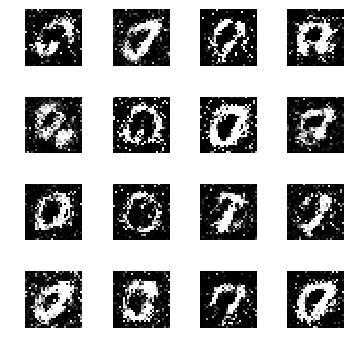

[25/Feb/2019 05:52:10] INFO - epoch: 1501, [Discriminator: 0.5462145805358887], [Generator: 0.8888095617294312]
[25/Feb/2019 05:52:10] INFO - epoch: 1502, [Discriminator: 0.5332037210464478], [Generator: 0.6694308519363403]
[25/Feb/2019 05:52:10] INFO - epoch: 1503, [Discriminator: 0.5641661286354065], [Generator: 0.9807462096214294]
[25/Feb/2019 05:52:10] INFO - epoch: 1504, [Discriminator: 0.6253639459609985], [Generator: 0.7231673002243042]
[25/Feb/2019 05:52:10] INFO - epoch: 1505, [Discriminator: 0.5605221390724182], [Generator: 1.323500394821167]
[25/Feb/2019 05:52:10] INFO - epoch: 1506, [Discriminator: 0.6256853342056274], [Generator: 0.5822961926460266]
[25/Feb/2019 05:52:10] INFO - epoch: 1507, [Discriminator: 0.6069686412811279], [Generator: 1.174903154373169]
[25/Feb/2019 05:52:10] INFO - epoch: 1508, [Discriminator: 0.5975836515426636], [Generator: 0.9917166829109192]
[25/Feb/2019 05:52:10] INFO - epoch: 1509, [Discriminator: 0.5978332757949829], [Generator: 0.661646962165

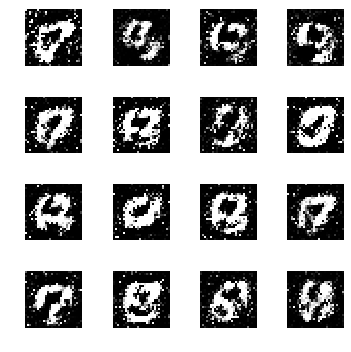

[25/Feb/2019 05:52:16] INFO - epoch: 1751, [Discriminator: 0.5941054224967957], [Generator: 1.2254363298416138]
[25/Feb/2019 05:52:16] INFO - epoch: 1752, [Discriminator: 0.5590462684631348], [Generator: 1.0132317543029785]
[25/Feb/2019 05:52:17] INFO - epoch: 1753, [Discriminator: 0.527935266494751], [Generator: 0.9303755760192871]
[25/Feb/2019 05:52:17] INFO - epoch: 1754, [Discriminator: 0.493722140789032], [Generator: 1.3793866634368896]
[25/Feb/2019 05:52:17] INFO - epoch: 1755, [Discriminator: 0.6569300293922424], [Generator: 0.6700113415718079]
[25/Feb/2019 05:52:17] INFO - epoch: 1756, [Discriminator: 0.6236252784729004], [Generator: 1.1601632833480835]
[25/Feb/2019 05:52:17] INFO - epoch: 1757, [Discriminator: 0.5421451330184937], [Generator: 0.9715443849563599]
[25/Feb/2019 05:52:17] INFO - epoch: 1758, [Discriminator: 0.5368220210075378], [Generator: 0.8334702253341675]
[25/Feb/2019 05:52:17] INFO - epoch: 1759, [Discriminator: 0.547199010848999], [Generator: 1.2448979616165

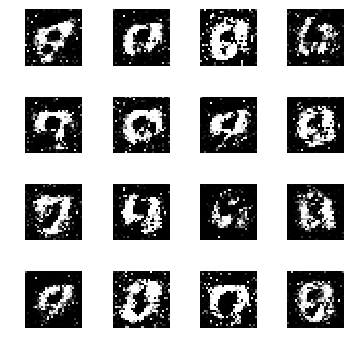

[25/Feb/2019 05:52:23] INFO - epoch: 2001, [Discriminator: 0.5167909860610962], [Generator: 1.1786562204360962]
[25/Feb/2019 05:52:23] INFO - epoch: 2002, [Discriminator: 0.5606025457382202], [Generator: 0.8677413463592529]
[25/Feb/2019 05:52:23] INFO - epoch: 2003, [Discriminator: 0.6773086786270142], [Generator: 0.6618070602416992]
[25/Feb/2019 05:52:23] INFO - epoch: 2004, [Discriminator: 0.5978606343269348], [Generator: 1.3006997108459473]
[25/Feb/2019 05:52:23] INFO - epoch: 2005, [Discriminator: 0.6573981046676636], [Generator: 0.7777032852172852]
[25/Feb/2019 05:52:23] INFO - epoch: 2006, [Discriminator: 0.5145542621612549], [Generator: 1.0773175954818726]
[25/Feb/2019 05:52:23] INFO - epoch: 2007, [Discriminator: 0.5764025449752808], [Generator: 0.8361283540725708]
[25/Feb/2019 05:52:23] INFO - epoch: 2008, [Discriminator: 0.5565979480743408], [Generator: 0.9618203639984131]
[25/Feb/2019 05:52:23] INFO - epoch: 2009, [Discriminator: 0.5067647695541382], [Generator: 0.8769310116

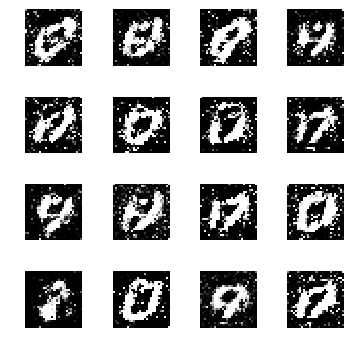

[25/Feb/2019 05:52:30] INFO - epoch: 2251, [Discriminator: 0.6260029673576355], [Generator: 1.1681219339370728]
[25/Feb/2019 05:52:30] INFO - epoch: 2252, [Discriminator: 0.6356778144836426], [Generator: 0.8254151344299316]
[25/Feb/2019 05:52:30] INFO - epoch: 2253, [Discriminator: 0.5427933931350708], [Generator: 0.9884542226791382]
[25/Feb/2019 05:52:30] INFO - epoch: 2254, [Discriminator: 0.5162889361381531], [Generator: 1.0324203968048096]
[25/Feb/2019 05:52:30] INFO - epoch: 2255, [Discriminator: 0.5745708346366882], [Generator: 0.897945761680603]
[25/Feb/2019 05:52:30] INFO - epoch: 2256, [Discriminator: 0.5310876369476318], [Generator: 0.8218938708305359]
[25/Feb/2019 05:52:30] INFO - epoch: 2257, [Discriminator: 0.6076020002365112], [Generator: 1.144193410873413]
[25/Feb/2019 05:52:30] INFO - epoch: 2258, [Discriminator: 0.6026854515075684], [Generator: 0.9517109394073486]
[25/Feb/2019 05:52:30] INFO - epoch: 2259, [Discriminator: 0.46604984998703003], [Generator: 0.80050957202

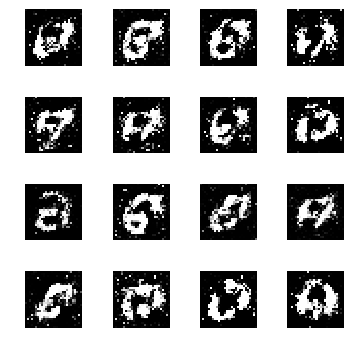

[25/Feb/2019 05:52:36] INFO - epoch: 2501, [Discriminator: 0.5985402464866638], [Generator: 0.8144160509109497]
[25/Feb/2019 05:52:36] INFO - epoch: 2502, [Discriminator: 0.6493725180625916], [Generator: 1.0953857898712158]
[25/Feb/2019 05:52:36] INFO - epoch: 2503, [Discriminator: 0.565361499786377], [Generator: 0.9154868125915527]
[25/Feb/2019 05:52:36] INFO - epoch: 2504, [Discriminator: 0.5832433104515076], [Generator: 0.9028284549713135]
[25/Feb/2019 05:52:36] INFO - epoch: 2505, [Discriminator: 0.5177042484283447], [Generator: 1.0880295038223267]
[25/Feb/2019 05:52:37] INFO - epoch: 2506, [Discriminator: 0.5808574557304382], [Generator: 1.0412675142288208]
[25/Feb/2019 05:52:37] INFO - epoch: 2507, [Discriminator: 0.6268792152404785], [Generator: 0.8177632689476013]
[25/Feb/2019 05:52:37] INFO - epoch: 2508, [Discriminator: 0.5739820599555969], [Generator: 0.8178772926330566]
[25/Feb/2019 05:52:37] INFO - epoch: 2509, [Discriminator: 0.6293548941612244], [Generator: 1.62000179290

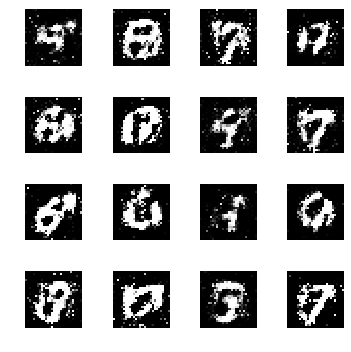

[25/Feb/2019 05:52:43] INFO - epoch: 2751, [Discriminator: 0.5543704032897949], [Generator: 0.8159979581832886]
[25/Feb/2019 05:52:43] INFO - epoch: 2752, [Discriminator: 0.6009025573730469], [Generator: 0.9462178945541382]
[25/Feb/2019 05:52:43] INFO - epoch: 2753, [Discriminator: 0.5871874690055847], [Generator: 0.725330114364624]
[25/Feb/2019 05:52:43] INFO - epoch: 2754, [Discriminator: 0.4872238337993622], [Generator: 1.463258981704712]
[25/Feb/2019 05:52:43] INFO - epoch: 2755, [Discriminator: 0.6655157804489136], [Generator: 1.3147757053375244]
[25/Feb/2019 05:52:43] INFO - epoch: 2756, [Discriminator: 0.6510976552963257], [Generator: 0.44949817657470703]
[25/Feb/2019 05:52:43] INFO - epoch: 2757, [Discriminator: 0.7173070311546326], [Generator: 1.1893987655639648]
[25/Feb/2019 05:52:43] INFO - epoch: 2758, [Discriminator: 0.570614218711853], [Generator: 1.8849139213562012]
[25/Feb/2019 05:52:43] INFO - epoch: 2759, [Discriminator: 0.8704600930213928], [Generator: 0.561157584190

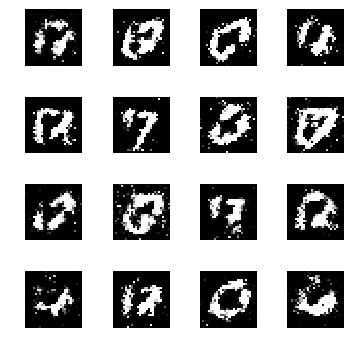

[25/Feb/2019 05:52:50] INFO - epoch: 3001, [Discriminator: 0.5316611528396606], [Generator: 0.9152404069900513]
[25/Feb/2019 05:52:50] INFO - epoch: 3002, [Discriminator: 0.6219544410705566], [Generator: 0.8405939936637878]
[25/Feb/2019 05:52:50] INFO - epoch: 3003, [Discriminator: 0.7282759547233582], [Generator: 1.4935145378112793]
[25/Feb/2019 05:52:50] INFO - epoch: 3004, [Discriminator: 0.7722666263580322], [Generator: 0.6432870030403137]
[25/Feb/2019 05:52:50] INFO - epoch: 3005, [Discriminator: 0.5802625417709351], [Generator: 0.7475956678390503]
[25/Feb/2019 05:52:50] INFO - epoch: 3006, [Discriminator: 0.7930713891983032], [Generator: 0.9322110414505005]
[25/Feb/2019 05:52:50] INFO - epoch: 3007, [Discriminator: 0.5448499917984009], [Generator: 1.1317189931869507]
[25/Feb/2019 05:52:50] INFO - epoch: 3008, [Discriminator: 0.6005642414093018], [Generator: 0.8915739059448242]
[25/Feb/2019 05:52:50] INFO - epoch: 3009, [Discriminator: 0.5435432195663452], [Generator: 0.9774473905

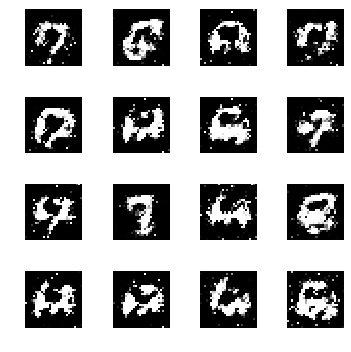

[25/Feb/2019 05:52:56] INFO - epoch: 3251, [Discriminator: 0.600802481174469], [Generator: 0.8700578808784485]
[25/Feb/2019 05:52:56] INFO - epoch: 3252, [Discriminator: 0.47951456904411316], [Generator: 0.9660910964012146]
[25/Feb/2019 05:52:56] INFO - epoch: 3253, [Discriminator: 0.6559818983078003], [Generator: 1.022897481918335]
[25/Feb/2019 05:52:56] INFO - epoch: 3254, [Discriminator: 0.6398074626922607], [Generator: 0.7029404640197754]
[25/Feb/2019 05:52:56] INFO - epoch: 3255, [Discriminator: 0.7628927230834961], [Generator: 0.8401191234588623]
[25/Feb/2019 05:52:56] INFO - epoch: 3256, [Discriminator: 0.4958842992782593], [Generator: 1.5318129062652588]
[25/Feb/2019 05:52:56] INFO - epoch: 3257, [Discriminator: 0.6958027482032776], [Generator: 0.6398255825042725]
[25/Feb/2019 05:52:56] INFO - epoch: 3258, [Discriminator: 0.502184271812439], [Generator: 0.7163456082344055]
[25/Feb/2019 05:52:56] INFO - epoch: 3259, [Discriminator: 0.7029872536659241], [Generator: 1.126201272010

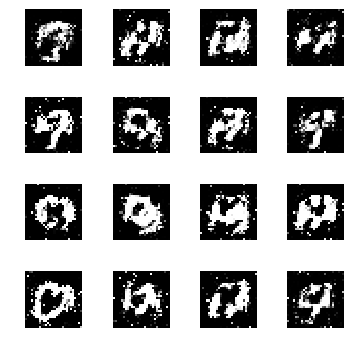

[25/Feb/2019 05:53:03] INFO - epoch: 3501, [Discriminator: 0.5854352712631226], [Generator: 0.6881053447723389]
[25/Feb/2019 05:53:03] INFO - epoch: 3502, [Discriminator: 0.5597236752510071], [Generator: 0.9376481175422668]
[25/Feb/2019 05:53:03] INFO - epoch: 3503, [Discriminator: 0.4895063042640686], [Generator: 1.0648832321166992]
[25/Feb/2019 05:53:03] INFO - epoch: 3504, [Discriminator: 0.5084231495857239], [Generator: 1.006030559539795]
[25/Feb/2019 05:53:03] INFO - epoch: 3505, [Discriminator: 0.6897466778755188], [Generator: 0.7436141967773438]
[25/Feb/2019 05:53:03] INFO - epoch: 3506, [Discriminator: 0.5469247698783875], [Generator: 0.8625677824020386]
[25/Feb/2019 05:53:03] INFO - epoch: 3507, [Discriminator: 0.5535364747047424], [Generator: 1.0315771102905273]
[25/Feb/2019 05:53:03] INFO - epoch: 3508, [Discriminator: 0.6626033782958984], [Generator: 0.7875109910964966]
[25/Feb/2019 05:53:03] INFO - epoch: 3509, [Discriminator: 0.5634303092956543], [Generator: 1.10823321342

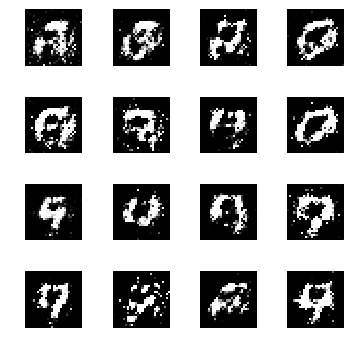

[25/Feb/2019 05:53:10] INFO - epoch: 3751, [Discriminator: 0.5988888144493103], [Generator: 0.9063128232955933]
[25/Feb/2019 05:53:10] INFO - epoch: 3752, [Discriminator: 0.620084285736084], [Generator: 1.082122564315796]
[25/Feb/2019 05:53:10] INFO - epoch: 3753, [Discriminator: 0.572360634803772], [Generator: 0.7614173293113708]
[25/Feb/2019 05:53:10] INFO - epoch: 3754, [Discriminator: 0.6504018902778625], [Generator: 1.254262924194336]
[25/Feb/2019 05:53:10] INFO - epoch: 3755, [Discriminator: 0.6548175811767578], [Generator: 0.8438620567321777]
[25/Feb/2019 05:53:10] INFO - epoch: 3756, [Discriminator: 0.5215039849281311], [Generator: 0.7055349946022034]
[25/Feb/2019 05:53:10] INFO - epoch: 3757, [Discriminator: 0.554283857345581], [Generator: 0.9602130651473999]
[25/Feb/2019 05:53:10] INFO - epoch: 3758, [Discriminator: 0.5764867067337036], [Generator: 1.0602598190307617]
[25/Feb/2019 05:53:10] INFO - epoch: 3759, [Discriminator: 0.5711132287979126], [Generator: 1.078630089759826

In [0]:
%matplotlib inline

disc_loss = []
gen_loss = []
for cnt in range(4000):

  random_index = np.random.randint(0, len(X_train) - batch / 2)
  legit_images = X_train[random_index: random_index + batch // 2].reshape(batch // 2, 28, 28, 1)
  gen_noise = np.random.normal(-1, 1, (batch // 2, 100))/2
  syntetic_images = Generator.predict(gen_noise)

  x_combined_batch = np.concatenate((legit_images, syntetic_images))
  y_combined_batch = np.concatenate((np.ones((batch // 2, 1)), np.zeros((batch // 2, 1))))

  d_loss = Discriminator.train_on_batch(x_combined_batch, y_combined_batch)

  noise = np.random.normal(-1, 1, (batch, 100))/2
  y_mislabled = np.ones((batch, 1))

  g_loss = stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

  logger.info('epoch: {}, [Discriminator: {}], [Generator: {}]'.format(cnt, d_loss[0], g_loss))
  disc_loss.append(d_loss[0])
  gen_loss.append(g_loss)

  if cnt % save_interval == 0:
      plot_images(step=cnt)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


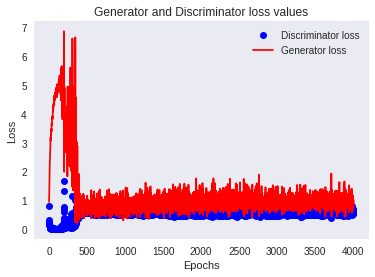

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 4001)
plt.plot(epochs, disc_loss, 'bo', label='Discriminator loss')
plt.plot(epochs, gen_loss, 'r', label='Generator loss')
plt.title('Generator and Discriminator loss values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

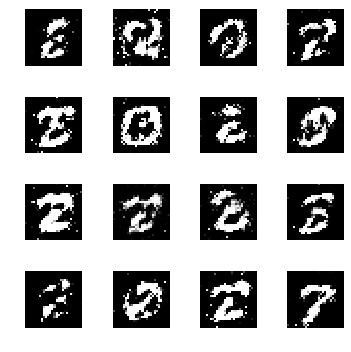

In [0]:
plot_images(step=cnt)

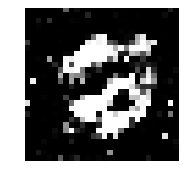

In [0]:
noise = np.random.normal(0, 1, (1, 100))
images = Generator.predict(noise)
plt.figure(figsize=(10, 10))

for i in range(images.shape[0]):
    plt.subplot(4, 4, i + 1)
    image = images[i, :, :, :]
    image = np.reshape(image, [28, 28])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# DCGAN

In [0]:
def generator():
    model = Sequential()
    model.add(Dense(input_dim=100, output_dim=1024))
    model.add(Activation('tanh'))
    model.add(Dense(128*7*7))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(1, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    return model


def discriminator():
    model = Sequential()
    model.add(
            Conv2D(64, (5, 5),
            padding='same',
            input_shape=(28, 28, 1))
            )
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('tanh'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [0]:
Generator = generator()
Generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

Discriminator = discriminator()
Discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8),metrics=['accuracy'])

def stacked_generator_discriminator(D, G):
    D.trainable = False
    model = Sequential()
    model.add(G)
    model.add(D)
    return model
	
stacked_generator_discriminator = stacked_generator_discriminator(Discriminator, Generator)
stacked_generator_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1024)`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[25/Feb/2019 05:57:08] INFO - epoch: 0, [Discriminator: 0.7419787645339966], [Generator: 0.4231715202331543]


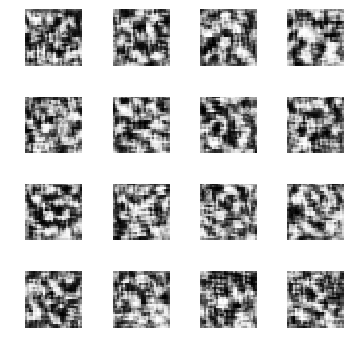

[25/Feb/2019 05:57:09] INFO - epoch: 1, [Discriminator: 0.6469832062721252], [Generator: 0.7687826752662659]
[25/Feb/2019 05:57:09] INFO - epoch: 2, [Discriminator: 0.40000802278518677], [Generator: 1.5102624893188477]
[25/Feb/2019 05:57:09] INFO - epoch: 3, [Discriminator: 0.24904191493988037], [Generator: 2.4092764854431152]
[25/Feb/2019 05:57:09] INFO - epoch: 4, [Discriminator: 0.16231021285057068], [Generator: 2.957845449447632]
[25/Feb/2019 05:57:09] INFO - epoch: 5, [Discriminator: 0.10347040742635727], [Generator: 3.212686777114868]
[25/Feb/2019 05:57:09] INFO - epoch: 6, [Discriminator: 0.15034827589988708], [Generator: 2.880474328994751]
[25/Feb/2019 05:57:09] INFO - epoch: 7, [Discriminator: 0.09349999576807022], [Generator: 3.11860990524292]
[25/Feb/2019 05:57:09] INFO - epoch: 8, [Discriminator: 0.2552160620689392], [Generator: 3.6992368698120117]
[25/Feb/2019 05:57:09] INFO - epoch: 9, [Discriminator: 0.5328835844993591], [Generator: 4.077569007873535]
[25/Feb/2019 05:57:

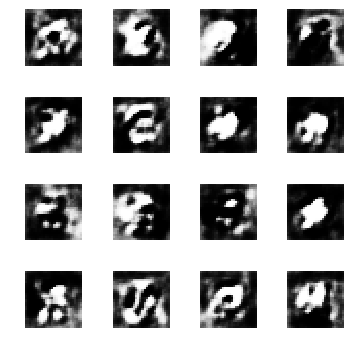

[25/Feb/2019 05:57:21] INFO - epoch: 251, [Discriminator: 1.3750792741775513], [Generator: 0.8944942355155945]
[25/Feb/2019 05:57:21] INFO - epoch: 252, [Discriminator: 0.146378293633461], [Generator: 1.287632703781128]
[25/Feb/2019 05:57:21] INFO - epoch: 253, [Discriminator: 0.12856118381023407], [Generator: 0.5978660583496094]
[25/Feb/2019 05:57:21] INFO - epoch: 254, [Discriminator: 0.16020706295967102], [Generator: 0.508759617805481]
[25/Feb/2019 05:57:21] INFO - epoch: 255, [Discriminator: 0.0596608892083168], [Generator: 0.6588674783706665]
[25/Feb/2019 05:57:21] INFO - epoch: 256, [Discriminator: 0.160985067486763], [Generator: 0.8544598817825317]
[25/Feb/2019 05:57:21] INFO - epoch: 257, [Discriminator: 0.16649289429187775], [Generator: 1.3915622234344482]
[25/Feb/2019 05:57:21] INFO - epoch: 258, [Discriminator: 0.2697463929653168], [Generator: 0.32650747895240784]
[25/Feb/2019 05:57:21] INFO - epoch: 259, [Discriminator: 0.3370610177516937], [Generator: 1.0878466367721558]
[

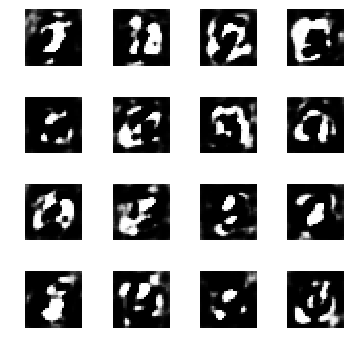

[25/Feb/2019 05:57:32] INFO - epoch: 501, [Discriminator: 0.2997238337993622], [Generator: 1.6210508346557617]
[25/Feb/2019 05:57:32] INFO - epoch: 502, [Discriminator: 0.42545071244239807], [Generator: 1.589073896408081]
[25/Feb/2019 05:57:32] INFO - epoch: 503, [Discriminator: 0.22954823076725006], [Generator: 1.1323230266571045]
[25/Feb/2019 05:57:32] INFO - epoch: 504, [Discriminator: 0.3176882565021515], [Generator: 0.7531019449234009]
[25/Feb/2019 05:57:32] INFO - epoch: 505, [Discriminator: 0.3429390788078308], [Generator: 0.9116693735122681]
[25/Feb/2019 05:57:32] INFO - epoch: 506, [Discriminator: 0.2598109543323517], [Generator: 1.6267108917236328]
[25/Feb/2019 05:57:32] INFO - epoch: 507, [Discriminator: 0.6424223780632019], [Generator: 0.13535544276237488]
[25/Feb/2019 05:57:32] INFO - epoch: 508, [Discriminator: 0.8455923795700073], [Generator: 1.777479648590088]
[25/Feb/2019 05:57:33] INFO - epoch: 509, [Discriminator: 0.4166381359100342], [Generator: 1.2008107900619507]


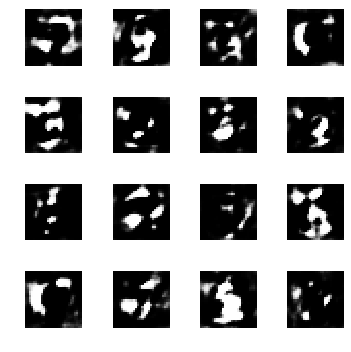

[25/Feb/2019 05:57:44] INFO - epoch: 751, [Discriminator: 0.7830365300178528], [Generator: 1.188415765762329]
[25/Feb/2019 05:57:44] INFO - epoch: 752, [Discriminator: 0.5547289848327637], [Generator: 2.4845898151397705]
[25/Feb/2019 05:57:44] INFO - epoch: 753, [Discriminator: 0.9152589440345764], [Generator: 0.24596521258354187]
[25/Feb/2019 05:57:44] INFO - epoch: 754, [Discriminator: 0.45960748195648193], [Generator: 1.4269746541976929]
[25/Feb/2019 05:57:44] INFO - epoch: 755, [Discriminator: 0.3970352113246918], [Generator: 2.1507019996643066]
[25/Feb/2019 05:57:44] INFO - epoch: 756, [Discriminator: 0.7158485054969788], [Generator: 0.7948370575904846]
[25/Feb/2019 05:57:44] INFO - epoch: 757, [Discriminator: 0.4754428267478943], [Generator: 1.8646514415740967]
[25/Feb/2019 05:57:44] INFO - epoch: 758, [Discriminator: 0.26353442668914795], [Generator: 2.93548846244812]
[25/Feb/2019 05:57:44] INFO - epoch: 759, [Discriminator: 0.42915380001068115], [Generator: 2.4424610137939453]


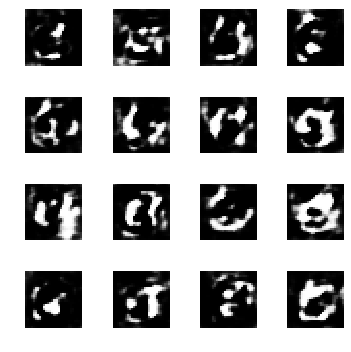

[25/Feb/2019 05:57:55] INFO - epoch: 1001, [Discriminator: 0.13598525524139404], [Generator: 0.9296436309814453]
[25/Feb/2019 05:57:55] INFO - epoch: 1002, [Discriminator: 0.14023298025131226], [Generator: 1.5064740180969238]
[25/Feb/2019 05:57:55] INFO - epoch: 1003, [Discriminator: 0.07318630814552307], [Generator: 1.0076544284820557]
[25/Feb/2019 05:57:55] INFO - epoch: 1004, [Discriminator: 0.4498060941696167], [Generator: 0.3705757260322571]
[25/Feb/2019 05:57:55] INFO - epoch: 1005, [Discriminator: 0.7293601632118225], [Generator: 3.1736032962799072]
[25/Feb/2019 05:57:55] INFO - epoch: 1006, [Discriminator: 0.08931204676628113], [Generator: 5.3143510818481445]
[25/Feb/2019 05:57:55] INFO - epoch: 1007, [Discriminator: 0.7075905203819275], [Generator: 0.3625689446926117]
[25/Feb/2019 05:57:55] INFO - epoch: 1008, [Discriminator: 0.5645170211791992], [Generator: 1.0334632396697998]
[25/Feb/2019 05:57:56] INFO - epoch: 1009, [Discriminator: 0.07893239706754684], [Generator: 2.53185

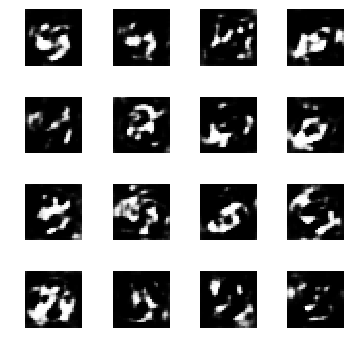

[25/Feb/2019 05:58:07] INFO - epoch: 1251, [Discriminator: 0.1384173035621643], [Generator: 0.8902699947357178]
[25/Feb/2019 05:58:07] INFO - epoch: 1252, [Discriminator: 0.04847963899374008], [Generator: 1.6552802324295044]
[25/Feb/2019 05:58:07] INFO - epoch: 1253, [Discriminator: 0.16749419271945953], [Generator: 2.1049771308898926]
[25/Feb/2019 05:58:07] INFO - epoch: 1254, [Discriminator: 0.10824669152498245], [Generator: 1.647251844406128]
[25/Feb/2019 05:58:07] INFO - epoch: 1255, [Discriminator: 0.08783309906721115], [Generator: 0.6428914070129395]
[25/Feb/2019 05:58:07] INFO - epoch: 1256, [Discriminator: 0.23552276194095612], [Generator: 1.0117428302764893]
[25/Feb/2019 05:58:07] INFO - epoch: 1257, [Discriminator: 0.24242258071899414], [Generator: 0.7851662635803223]
[25/Feb/2019 05:58:07] INFO - epoch: 1258, [Discriminator: 0.11990899592638016], [Generator: 1.5285693407058716]
[25/Feb/2019 05:58:07] INFO - epoch: 1259, [Discriminator: 0.050280097872018814], [Generator: 1.71

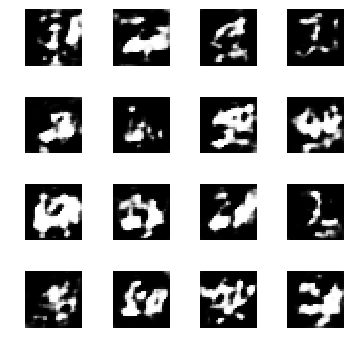

[25/Feb/2019 05:58:18] INFO - epoch: 1501, [Discriminator: 0.018247533589601517], [Generator: 0.2919822931289673]
[25/Feb/2019 05:58:18] INFO - epoch: 1502, [Discriminator: 0.10234399884939194], [Generator: 0.6164599657058716]
[25/Feb/2019 05:58:18] INFO - epoch: 1503, [Discriminator: 0.2277151495218277], [Generator: 0.9104634523391724]
[25/Feb/2019 05:58:18] INFO - epoch: 1504, [Discriminator: 0.030312616378068924], [Generator: 1.2803516387939453]
[25/Feb/2019 05:58:18] INFO - epoch: 1505, [Discriminator: 0.07031058520078659], [Generator: 2.1418509483337402]
[25/Feb/2019 05:58:18] INFO - epoch: 1506, [Discriminator: 0.2670363783836365], [Generator: 1.2012038230895996]
[25/Feb/2019 05:58:19] INFO - epoch: 1507, [Discriminator: 0.14603856205940247], [Generator: 0.8866352438926697]
[25/Feb/2019 05:58:19] INFO - epoch: 1508, [Discriminator: 0.5394895076751709], [Generator: 2.8010659217834473]
[25/Feb/2019 05:58:19] INFO - epoch: 1509, [Discriminator: 0.6375540494918823], [Generator: 0.683

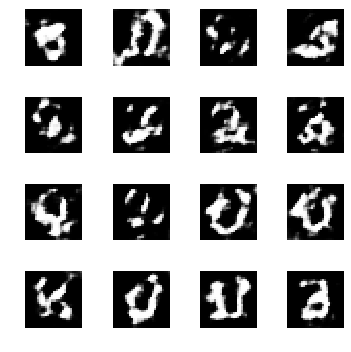

[25/Feb/2019 05:58:30] INFO - epoch: 1751, [Discriminator: 0.060554854571819305], [Generator: 1.7171653509140015]
[25/Feb/2019 05:58:30] INFO - epoch: 1752, [Discriminator: 0.19120556116104126], [Generator: 1.1650564670562744]
[25/Feb/2019 05:58:30] INFO - epoch: 1753, [Discriminator: 0.27546176314353943], [Generator: 0.4363073408603668]
[25/Feb/2019 05:58:30] INFO - epoch: 1754, [Discriminator: 0.39957547187805176], [Generator: 0.8158190846443176]
[25/Feb/2019 05:58:30] INFO - epoch: 1755, [Discriminator: 0.17444589734077454], [Generator: 2.276296377182007]
[25/Feb/2019 05:58:30] INFO - epoch: 1756, [Discriminator: 0.38714009523391724], [Generator: 1.0560176372528076]
[25/Feb/2019 05:58:30] INFO - epoch: 1757, [Discriminator: 0.10207867622375488], [Generator: 0.7552601099014282]
[25/Feb/2019 05:58:30] INFO - epoch: 1758, [Discriminator: 0.22450217604637146], [Generator: 0.3838968276977539]
[25/Feb/2019 05:58:30] INFO - epoch: 1759, [Discriminator: 0.2497139275074005], [Generator: 1.85

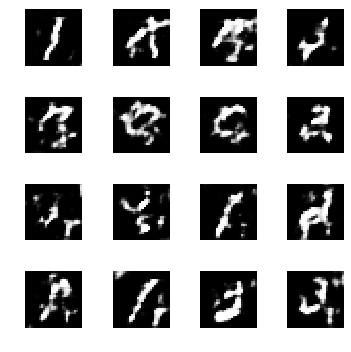

[25/Feb/2019 05:58:41] INFO - epoch: 2001, [Discriminator: 0.19742438197135925], [Generator: 0.9275946617126465]
[25/Feb/2019 05:58:41] INFO - epoch: 2002, [Discriminator: 0.11354400217533112], [Generator: 1.1889464855194092]
[25/Feb/2019 05:58:42] INFO - epoch: 2003, [Discriminator: 0.15877096354961395], [Generator: 1.5861175060272217]
[25/Feb/2019 05:58:42] INFO - epoch: 2004, [Discriminator: 0.124580018222332], [Generator: 1.1317899227142334]
[25/Feb/2019 05:58:42] INFO - epoch: 2005, [Discriminator: 0.1464773416519165], [Generator: 1.0459706783294678]
[25/Feb/2019 05:58:42] INFO - epoch: 2006, [Discriminator: 0.2606164813041687], [Generator: 0.5228055715560913]
[25/Feb/2019 05:58:42] INFO - epoch: 2007, [Discriminator: 0.20391839742660522], [Generator: 1.4595038890838623]
[25/Feb/2019 05:58:42] INFO - epoch: 2008, [Discriminator: 0.1117962896823883], [Generator: 1.7284995317459106]
[25/Feb/2019 05:58:42] INFO - epoch: 2009, [Discriminator: 0.15339712798595428], [Generator: 1.058414

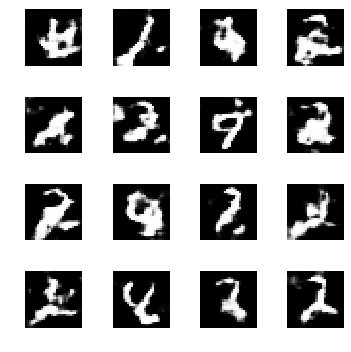

[25/Feb/2019 05:58:53] INFO - epoch: 2251, [Discriminator: 0.5789090991020203], [Generator: 2.1554882526397705]
[25/Feb/2019 05:58:53] INFO - epoch: 2252, [Discriminator: 0.22448450326919556], [Generator: 4.228257179260254]
[25/Feb/2019 05:58:53] INFO - epoch: 2253, [Discriminator: 0.6685247421264648], [Generator: 1.2542412281036377]
[25/Feb/2019 05:58:53] INFO - epoch: 2254, [Discriminator: 0.21161681413650513], [Generator: 0.2664509415626526]
[25/Feb/2019 05:58:53] INFO - epoch: 2255, [Discriminator: 0.6966392397880554], [Generator: 2.0350780487060547]
[25/Feb/2019 05:58:53] INFO - epoch: 2256, [Discriminator: 0.27992668747901917], [Generator: 2.228306770324707]
[25/Feb/2019 05:58:53] INFO - epoch: 2257, [Discriminator: 0.36227160692214966], [Generator: 0.9857171177864075]
[25/Feb/2019 05:58:53] INFO - epoch: 2258, [Discriminator: 0.46645957231521606], [Generator: 1.669661283493042]
[25/Feb/2019 05:58:53] INFO - epoch: 2259, [Discriminator: 0.1639491468667984], [Generator: 2.09025812

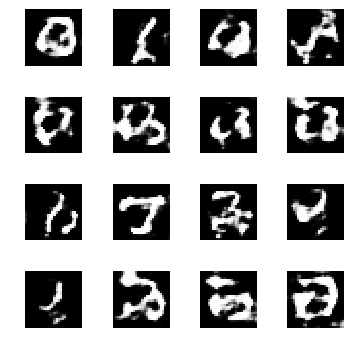

[25/Feb/2019 05:59:04] INFO - epoch: 2501, [Discriminator: 0.25424924492836], [Generator: 2.614743947982788]
[25/Feb/2019 05:59:04] INFO - epoch: 2502, [Discriminator: 0.6359879374504089], [Generator: 1.6016645431518555]
[25/Feb/2019 05:59:05] INFO - epoch: 2503, [Discriminator: 0.4003788232803345], [Generator: 1.0340496301651]
[25/Feb/2019 05:59:05] INFO - epoch: 2504, [Discriminator: 0.39303115010261536], [Generator: 1.7075788974761963]
[25/Feb/2019 05:59:05] INFO - epoch: 2505, [Discriminator: 0.16658970713615417], [Generator: 2.490180253982544]
[25/Feb/2019 05:59:05] INFO - epoch: 2506, [Discriminator: 0.3443160653114319], [Generator: 1.447864294052124]
[25/Feb/2019 05:59:05] INFO - epoch: 2507, [Discriminator: 0.32315394282341003], [Generator: 1.5477960109710693]
[25/Feb/2019 05:59:05] INFO - epoch: 2508, [Discriminator: 0.2083890736103058], [Generator: 1.740488052368164]
[25/Feb/2019 05:59:05] INFO - epoch: 2509, [Discriminator: 0.32993781566619873], [Generator: 1.218320369720459

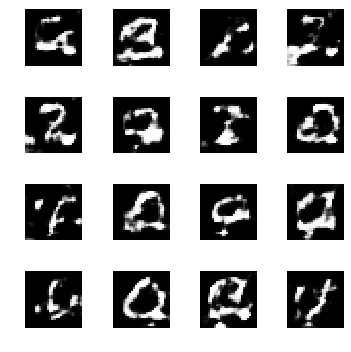

[25/Feb/2019 05:59:16] INFO - epoch: 2751, [Discriminator: 0.33427882194519043], [Generator: 2.635838031768799]
[25/Feb/2019 05:59:16] INFO - epoch: 2752, [Discriminator: 0.6468874216079712], [Generator: 1.1771148443222046]
[25/Feb/2019 05:59:16] INFO - epoch: 2753, [Discriminator: 0.26311296224594116], [Generator: 0.8412719964981079]
[25/Feb/2019 05:59:16] INFO - epoch: 2754, [Discriminator: 0.49993956089019775], [Generator: 2.192777633666992]
[25/Feb/2019 05:59:16] INFO - epoch: 2755, [Discriminator: 0.5734161138534546], [Generator: 1.5938702821731567]
[25/Feb/2019 05:59:16] INFO - epoch: 2756, [Discriminator: 0.3899204134941101], [Generator: 1.2279483079910278]
[25/Feb/2019 05:59:16] INFO - epoch: 2757, [Discriminator: 0.42054086923599243], [Generator: 1.3920807838439941]
[25/Feb/2019 05:59:16] INFO - epoch: 2758, [Discriminator: 0.41519999504089355], [Generator: 3.0178844928741455]
[25/Feb/2019 05:59:16] INFO - epoch: 2759, [Discriminator: 0.3952706456184387], [Generator: 1.8221831

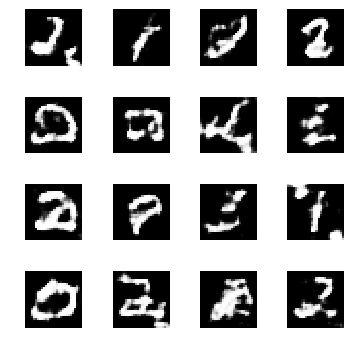

[25/Feb/2019 05:59:27] INFO - epoch: 3001, [Discriminator: 0.628839373588562], [Generator: 0.8273410797119141]
[25/Feb/2019 05:59:27] INFO - epoch: 3002, [Discriminator: 0.5962767601013184], [Generator: 0.9541759490966797]
[25/Feb/2019 05:59:27] INFO - epoch: 3003, [Discriminator: 0.424466073513031], [Generator: 2.170116662979126]
[25/Feb/2019 05:59:28] INFO - epoch: 3004, [Discriminator: 0.3782906234264374], [Generator: 1.6067817211151123]
[25/Feb/2019 05:59:28] INFO - epoch: 3005, [Discriminator: 0.309334397315979], [Generator: 1.5940566062927246]
[25/Feb/2019 05:59:28] INFO - epoch: 3006, [Discriminator: 0.3888145089149475], [Generator: 1.5092889070510864]
[25/Feb/2019 05:59:28] INFO - epoch: 3007, [Discriminator: 0.4644899368286133], [Generator: 1.4625905752182007]
[25/Feb/2019 05:59:28] INFO - epoch: 3008, [Discriminator: 0.5468209981918335], [Generator: 1.4039099216461182]
[25/Feb/2019 05:59:28] INFO - epoch: 3009, [Discriminator: 0.44175681471824646], [Generator: 1.2242064476013

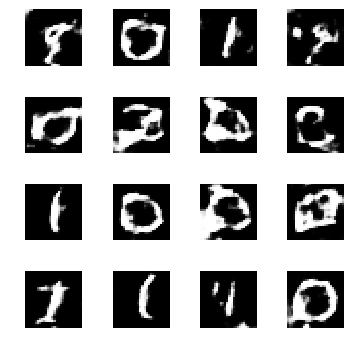

[25/Feb/2019 05:59:39] INFO - epoch: 3251, [Discriminator: 0.43912672996520996], [Generator: 1.455442190170288]
[25/Feb/2019 05:59:39] INFO - epoch: 3252, [Discriminator: 0.3850541114807129], [Generator: 1.6746246814727783]
[25/Feb/2019 05:59:39] INFO - epoch: 3253, [Discriminator: 0.36854439973831177], [Generator: 1.6106212139129639]
[25/Feb/2019 05:59:39] INFO - epoch: 3254, [Discriminator: 0.37542134523391724], [Generator: 1.2342228889465332]
[25/Feb/2019 05:59:39] INFO - epoch: 3255, [Discriminator: 0.38632363080978394], [Generator: 1.1042157411575317]
[25/Feb/2019 05:59:39] INFO - epoch: 3256, [Discriminator: 0.4203655421733856], [Generator: 0.9517140984535217]
[25/Feb/2019 05:59:39] INFO - epoch: 3257, [Discriminator: 0.39442378282546997], [Generator: 1.4801373481750488]
[25/Feb/2019 05:59:39] INFO - epoch: 3258, [Discriminator: 0.5864344239234924], [Generator: 1.4490760564804077]
[25/Feb/2019 05:59:39] INFO - epoch: 3259, [Discriminator: 0.496203750371933], [Generator: 1.0733339

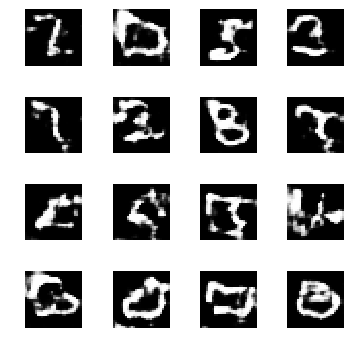

[25/Feb/2019 05:59:51] INFO - epoch: 3501, [Discriminator: 0.41950222849845886], [Generator: 1.0244332551956177]
[25/Feb/2019 05:59:51] INFO - epoch: 3502, [Discriminator: 0.4419540762901306], [Generator: 1.6741225719451904]
[25/Feb/2019 05:59:51] INFO - epoch: 3503, [Discriminator: 0.40445050597190857], [Generator: 1.5644818544387817]
[25/Feb/2019 05:59:51] INFO - epoch: 3504, [Discriminator: 0.423638254404068], [Generator: 1.3800032138824463]
[25/Feb/2019 05:59:51] INFO - epoch: 3505, [Discriminator: 0.5740481615066528], [Generator: 0.9794546365737915]
[25/Feb/2019 05:59:51] INFO - epoch: 3506, [Discriminator: 0.3563295602798462], [Generator: 1.2044734954833984]
[25/Feb/2019 05:59:51] INFO - epoch: 3507, [Discriminator: 0.3230622708797455], [Generator: 1.5212113857269287]
[25/Feb/2019 05:59:51] INFO - epoch: 3508, [Discriminator: 0.5329378843307495], [Generator: 1.6727914810180664]
[25/Feb/2019 05:59:51] INFO - epoch: 3509, [Discriminator: 0.31036311388015747], [Generator: 1.36635828

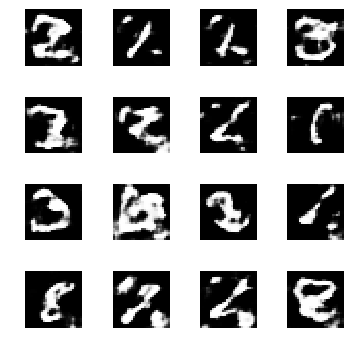

[25/Feb/2019 06:00:02] INFO - epoch: 3751, [Discriminator: 0.47043493390083313], [Generator: 1.3220241069793701]
[25/Feb/2019 06:00:02] INFO - epoch: 3752, [Discriminator: 0.39260560274124146], [Generator: 0.8380424976348877]
[25/Feb/2019 06:00:02] INFO - epoch: 3753, [Discriminator: 0.44383785128593445], [Generator: 1.0410943031311035]
[25/Feb/2019 06:00:02] INFO - epoch: 3754, [Discriminator: 0.31904715299606323], [Generator: 1.7338427305221558]
[25/Feb/2019 06:00:02] INFO - epoch: 3755, [Discriminator: 0.42081761360168457], [Generator: 1.3695766925811768]
[25/Feb/2019 06:00:02] INFO - epoch: 3756, [Discriminator: 0.555706799030304], [Generator: 1.138922929763794]
[25/Feb/2019 06:00:02] INFO - epoch: 3757, [Discriminator: 0.4064978361129761], [Generator: 1.1527130603790283]
[25/Feb/2019 06:00:02] INFO - epoch: 3758, [Discriminator: 0.3556412160396576], [Generator: 1.6642524003982544]
[25/Feb/2019 06:00:02] INFO - epoch: 3759, [Discriminator: 0.4996572732925415], [Generator: 1.1387808

In [0]:
%matplotlib inline
disc_loss = []
gen_loss = []
for cnt in range(4000):

  random_index = np.random.randint(0, len(X_train) - batch / 2)
  legit_images = X_train[random_index: random_index + batch // 2].reshape(batch // 2, 28, 28, 1)
  gen_noise = np.random.normal(-1, 1, (batch // 2, 100))/2
  syntetic_images = Generator.predict(gen_noise)

  x_combined_batch = np.concatenate((legit_images, syntetic_images))
  y_combined_batch = np.concatenate((np.ones((batch // 2, 1)), np.zeros((batch // 2, 1))))

  d_loss = Discriminator.train_on_batch(x_combined_batch, y_combined_batch)

  noise = np.random.normal(-1, 1, (batch, 100))/2
  y_mislabled = np.ones((batch, 1))

  g_loss = stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

  logger.info('epoch: {}, [Discriminator: {}], [Generator: {}]'.format(cnt, d_loss[0], g_loss))
  disc_loss.append(d_loss[0])
  gen_loss.append(g_loss)
  if cnt % save_interval == 0:
      plot_images(step=cnt)	

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


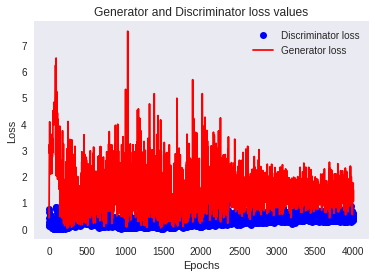

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 4001)
plt.plot(epochs, disc_loss, 'bo', label='Discriminator loss')
plt.plot(epochs, gen_loss, 'r', label='Generator loss')
plt.title('Generator and Discriminator loss values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()